<a href="https://colab.research.google.com/github/AquilesClavel/RedesNeuronales/blob/main/Pr%C3%A1ctica1_RegresionLinealGradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 Regresión Lineal con Gradiente Descendiente


La mejor linea es de 0.9997999999991831*x + 0.00035000000184945895


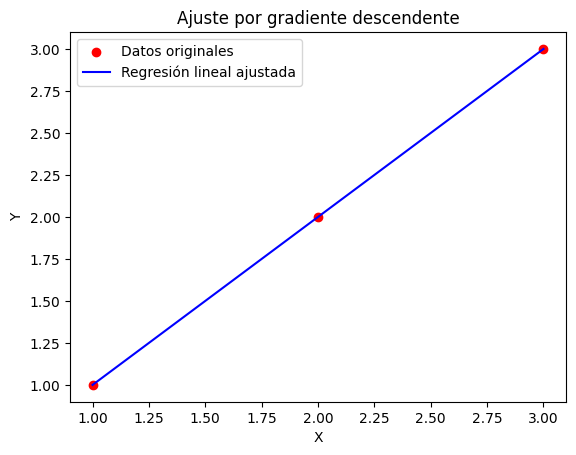

In [33]:
import numpy as np
import matplotlib.pyplot as plt

#Constante para la aproximación de la derivada
h=0.0001

valsX=np.array([1,2,3])
valsY=np.array([1,2,3])




def mse(m,x,b,y):#MSE
    linea = m*x+b
    n = len(valsX)
    res = np.sum((y-linea)**2)/n
    #print(f"MSE: {res}")
    return res


def aproximaciónT0(m,b):
    return (mse(m+h,valsX,b,valsY)-mse(m,valsX,b,valsY))/h

def aproximaciónT1(m,b):
    return (mse(m,valsX,b+h,valsY)-mse(m,valsX,b,valsY))/h


#gradiente descendiente

def grad_descend(mse,startT0,startT1,learning_rate,num_iter):
    t0 = startT0
    t1 = startT1
    historyT0 = [t0]
    historyT1 = [t1]
    for i in range(num_iter):
        t0 = t0-learning_rate*aproximaciónT0(t0,t1)
        t1 = t1-learning_rate*aproximaciónT1(t0,t1)

        historyT0.append(t0)
        historyT1.append(t1)
    return t0,t1, historyT0,historyT1

startT0 = np.random.rand()
startT1 = np.random.rand()
learning_rate = 0.09
num_iter = 1000

m,b,history1,history2 = grad_descend(mse,startT0,startT1,learning_rate,num_iter)

print(f"La mejor linea es de {m}*x + {b}")

# Grafica
plt.scatter(valsX, valsY, color="red", label="Datos originales")  # Datos
x_vals = np.linspace(min(valsX), max(valsX), 100)  # Valores X para la línea
y_vals = m * x_vals + b  # Línea ajustada
plt.plot(x_vals, y_vals, color="blue", label="Regresión lineal ajustada")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Ajuste por gradiente descendente")
plt.show()

